# <center>Predictive modelling with timeseries</center>
# <center> Part 3 - Time series forecasting with ARIMA models</center>

![Image](images/timeseries.jpg)

# Time series forecasting with ARIMA models

Very robust family of parametric models that can handle time series data with many combinations of properties.
ARIMA models have three components, the `AR` autoregressive, the `I` integrated, and `MA` moving average. the notation is put together as `ARIMA(p, d, q)`.


![Image](images/arima.png) 

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# jupyter lab configs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
plotly.offline.init_notebook_mode(connected=True)

from utils import adf_test
from utils import print_errors

In [10]:
# from statsmodels.tsa.arima_model import ARIMA,ARIMAResults
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pmdarima import auto_arima # on order to determine ARIMA orders
from statsmodels.tsa.stattools import adfuller

In [9]:
from statsmodels.tsa.arima.model import ARIMA,ARIMAResults

In [3]:
import pmdarima
pmdarima.__version__
plotly.__version__

'1.8.5'

'5.6.0'

# ETL

### Load the datasets  (Production of electrical equipments)

<AxesSubplot:>

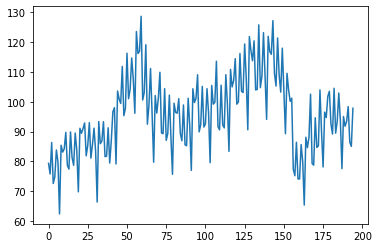

In [4]:
# load a nice example for decomposition - production of electrical equipments
ele_df = pd.read_csv('datasets/elecequip.csv')
ele_df['value'].plot()

---

### Split train and test

In [5]:
train = ele_df.loc[:150, 'value']
test = ele_df.loc[150:, 'value']
test_start = 150
test_end = 194

## Create baseline and check model performance

---

# Auto-regressive family of models

### Is the series  `stationary`?

In [6]:
adf_test(train)

Augmented Dickey-Fuller Test: 
Test the null hypothesis that the data is non-stationary
ADF test statistic       -2.790421
p-value                   0.059655
lags                     14.000000
# observations          136.000000
critical value (1%)      -3.479372
critical value (5%)      -2.883037
critical value (10%)     -2.578234
Fail to reject the null hypothesis, data is  non-stationary


0.05965507262883057

# ARMA - For a stationary series

What happens if we model this as a stationary series?
For ARMA and stationary data, we don't need the Integration/differencing parameter `d`, which is then set to 0.  We are then left with a ARMA model and heve to find the best `p` and `q`.
Let's see the impact of changing `p` and  `q`.

In [16]:
arma_model = ARIMA(train, order=(3,1,2))
results1_1 = arma_model.fit()
results1_1.summary() #.tables[0]

C:\Users\DAnand\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\DAnand\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                  151
Model:                 ARIMA(3, 1, 2)   Log Likelihood                -523.912
Date:                Tue, 18 Oct 2022   AIC                           1059.825
Time:                        16:42:44   BIC                           1077.889
Sample:                             0   HQIC                          1067.164
                                - 151                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2939      0.401     -0.733      0.464      -1.080       0.492
ar.L2         -0.2686      0.298     -0.902      0.367      -0.852       0.315
ar.L3          0.3969      0.302      1.313      0.189      -0.196       0.989
ma.L1         -0.4438      0.401     -1.107      0.268      -1.230       0.342
ma.L2         -0.2222      0.121     -1.829      0.067      -0.460       0.016
sigma2        62.5062      8.689      7.194      0.000      45.476      79.536
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 0.19
Prob(Q):                              0.85   Prob(JB):                         0.91
Heteroskedasticity (H):               1.01   Skew:                            -0.09
Prob(H) (two-sided):                  0.96   Kurtosis:                         3.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
# arma_model = ARIMA(train, order=(1,1,1))
# results1_1 = arma_model.fit()
# results1_1.summary().tables[0]

arma_model = ARIMA(train, order=(2,0,2))
results2_2 = arma_model.fit()
results2_2.summary().tables[0]

arma_model = ARIMA(train, order=(1,0,2))
results1_2 = arma_model.fit()
results1_2.summary().tables[0]

arma_model = ARIMA(train, order=(5,1,1))
results2_1 = arma_model.fit()
results2_1.summary().tables[0]

arma_model2 = ARIMA(train, order=(1,1,1))
results2_1 = arma_model2.fit()
results2_1.summary().tables[0]

Dep. Variable:,value,No. Observations:,151
Model:,"ARIMA(2, 0, 2)",Log Likelihood,-553.602
Date:,"Tue, 18 Oct 2022",AIC,1119.204
Time:,16:41:58,BIC,1137.308
Sample:,0,HQIC,1126.559
,- 151,,
Covariance Type:,opg,,


Dep. Variable:,value,No. Observations:,151
Model:,"ARIMA(1, 0, 2)",Log Likelihood,-553.143
Date:,"Tue, 18 Oct 2022",AIC,1116.285
Time:,16:41:59,BIC,1131.372
Sample:,0,HQIC,1122.414
,- 151,,
Covariance Type:,opg,,


Dep. Variable:,value,No. Observations:,151
Model:,"ARIMA(5, 1, 1)",Log Likelihood,-511.011
Date:,"Tue, 18 Oct 2022",AIC,1036.021
Time:,16:41:59,BIC,1057.096
Sample:,0,HQIC,1044.583
,- 151,,
Covariance Type:,opg,,


Dep. Variable:,value,No. Observations:,151
Model:,"ARIMA(1, 1, 1)",Log Likelihood,-552.211
Date:,"Tue, 18 Oct 2022",AIC,1110.421
Time:,16:41:59,BIC,1119.453
Sample:,0,HQIC,1114.091
,- 151,,
Covariance Type:,opg,,


Let's predict for the test interval:

In [17]:
predictions1 = results1_1.predict(start=test_start, end=test_end).rename('ARMA(1,1) Predictions')
predictions2 = results2_2.predict(start=test_start, end=test_end).rename('ARMA(2,2) Predictions')
predictions3 = results1_2.predict(start=test_start, end=test_end).rename('ARMA(1,2) Predictions')
predictions4 = results2_1.predict(start=test_start, end=test_end).rename('ARMA(5,1) Predictions')

<AxesSubplot:title={'center':'Prediction of equiment demand'}>

<AxesSubplot:title={'center':'Prediction of equiment demand'}>

<AxesSubplot:title={'center':'Prediction of equiment demand'}>

<AxesSubplot:title={'center':'Prediction of equiment demand'}>

<AxesSubplot:title={'center':'Prediction of equiment demand'}>

[Text(0.5, 0, ''), Text(0, 0.5, 'Demand')]

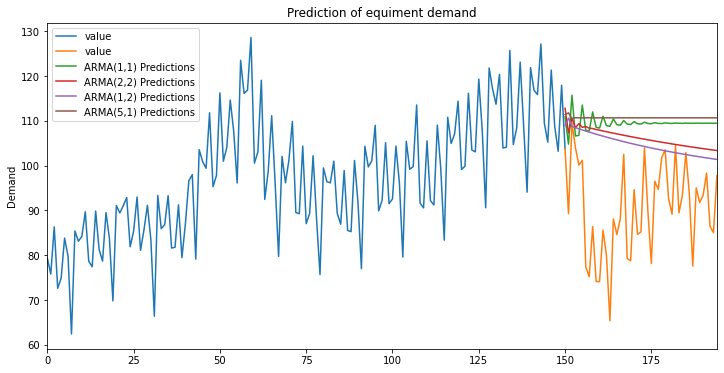

In [18]:
ylabel='Demand'
ax = train.plot(legend=True,figsize=(12,6),title='Prediction of equiment demand')
test.plot(legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True)
predictions3.plot(legend=True)
predictions4.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel="", ylabel=ylabel)

Did you notice the change in shape of predictions when we increase the AR component to 5?

# Wait a minute!  
## Do we have to try out and plot all possible combinations of (p, d, q)?
![Image](images/boring.jpg) 

## Luckly not.   

### Using AIC and a stewise routine `auto_arima()` made available in library `pmdarima`, we can find the best (p, d, q) for the data

💡 **Check also:** you can check this very nice implementation of a **grid search** of ARIMA models:
[https://machinelearningmastery.com/how-to-grid-search-sarima-model-hyperparameters-for-time-series-forecasting-in-python/]

# Stepwise ARIMA or SARIMA with `auto_arima()`

The function `auto_arima()` will fit different combinations of the orders of (p, d, q) and select the best based on the **lowest AIC**. You can indicate a seasonal model (SARIMA) if you set `seasonal=True` and change `m` to integer>1.

In [ ]:
best_model = auto_arima(train, suppress_warnings=True, 
                        random=False, start_p=0, start_q=0, 
                        stepwise=False,
                        random_state=42)
best_model.summary()

### What does it mean? 

The `auto_arima` is telling us that the best model (= lowest AIC) to treat these data is a 
> ARIMA(5, 1, 2) 

*p.s. An SARIMAX or SARIMA without a (P,D,Q)m component is the equivalent of an ARIMA*

### Now, what is the performance on actual test data?

In [ ]:
best_model = ARIMA(train, order=(2,1,3))
results = best_model.fit()

# predict
predictions = results.predict(start=test_start, end=test_end, 
                              dynamic=False, typ='levels').rename('SARIMAX(5,1,2) Predictions')

## How is the forecasting looking like in the `test` data?

In [ ]:
ylabel='Demand'
ax = test.plot(legend=True,figsize=(12,6),title='Prediction of equiment demand')
test.plot()
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel="", ylabel=ylabel)

In [ ]:
fig = px.line(test, title="Equipment demand - test data and predictions",  width=900, height=500)
fig.add_trace(go.Line(x=test.index, y=predictions,
                    mode='lines', name='SARIMAX'))
fig.show()

## Model evaluation:

In [ ]:
print_errors(test, predictions, 'Test set')

----

### Can we improve our predictions?
# Adding the seasonal component (SARIMA)

In [ ]:
best_model = auto_arima(train, suppress_warnings=True, start_p=0, start_q=0, m=6)
best_model.summary()

In [ ]:
best_model = SARIMAX(train, order=(3,1,0), seasonal_order=(2,0,1,6))
results = best_model.fit()

# predict
predictions = results.predict(start=test_start, end=test_end, 
                              dynamic=False, typ='levels').rename('SARIMAX Predictions')
print_errors(test, predictions, 'Test set')

In [ ]:
fig = px.line(test, title="Equipment demand - test data and predictions",  width=900, height=500)
fig.add_trace(go.Line(x=test.index, y=predictions,
                    mode='lines', name='SARIMAX'))
fig.show()

---

# Working with regressors - SARIMA**x**

In [ ]:
# training data
rossman_df = pd.read_csv('datasets/rossman_train.csv').reset_index(drop=True)
# set the index to the time column
rossman_df.Date = pd.to_datetime(rossman_df.Date)

# load store info
stores = pd.read_csv('datasets/rossman_store.csv').reset_index(drop=True)

# merge store and sales
rossman_df = pd.merge(rossman_df, stores, how='left', on='Store')
rossman_df = rossman_df[rossman_df.Store==1]

rossman_df.set_index('Date', drop=True, inplace=True)
rossman_df.head(4)

## Basic demonstration of the library usage
We need to add several polishing steps

In [ ]:
# Fit a model without any extra regressors
mod = SARIMAX(rossman_df.Sales, order=(1,1,0), seasonal_order=(2,0,1,7))
res = mod.fit(disp=False)
print(res.summary())

In [ ]:
# add timeseries (endog) and regressors (exog)
endog = rossman_df.Sales
exog = rossman_df.Customers

# Fit the model
mod2 = SARIMAX(endog, exog, order=(1,1,0), seasonal_order=(2,0,1,7))
res = mod2.fit(disp=False)
print(res.summary())

---

<a href='https://www.freepik.com/vectors/business'>Business vector created by freepik - www.freepik.com</a>